<a href="https://colab.research.google.com/github/howiehoman/DataMining/blob/main/W03_0706022310040_Howie_Homan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a class="anchor" id="0"></a>
# **W03 Data Mining Class Practice**
# **Howie Homan / 0706022310040**

In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [229]:
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/synthetic_coffee_health.csv"
df = pd.read_csv(url)
df.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [230]:
print(df.info())
print(df.describe())
print("Missing values before handling:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

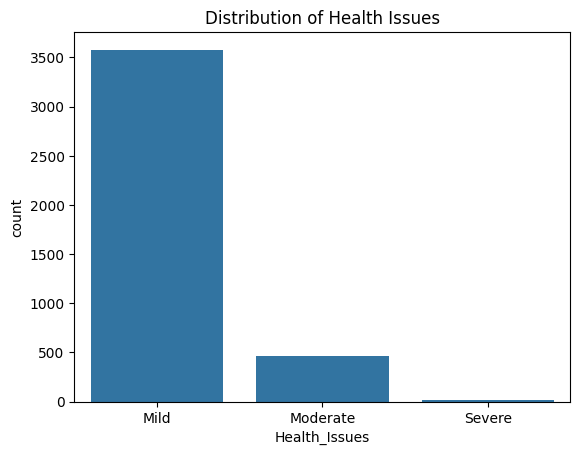

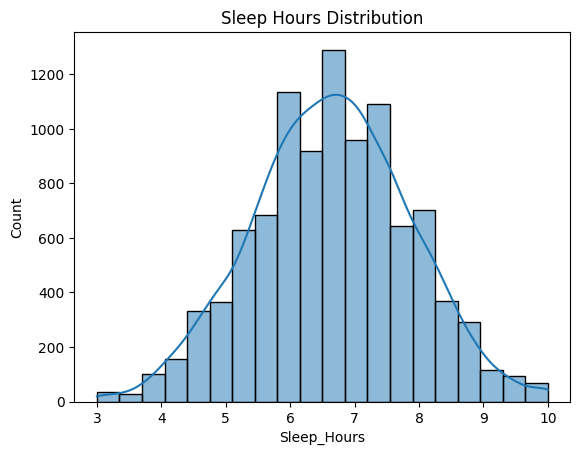

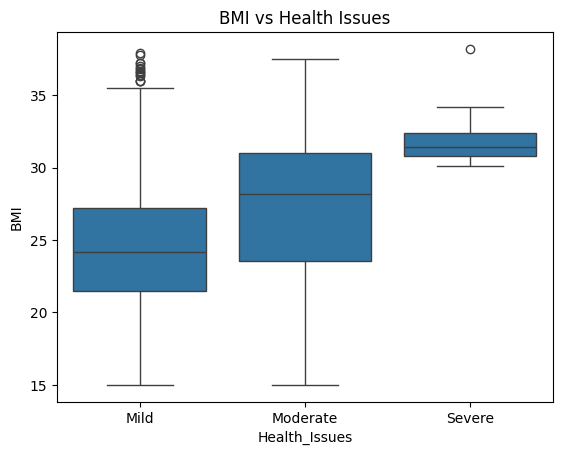

In [231]:
# Health Issues Distribution
sns.countplot(x="Health_Issues", data=df)
plt.title("Distribution of Health Issues")
plt.show()

# Sleep Hours Distribution
sns.histplot(df["Sleep_Hours"], bins=20, kde=True)
plt.title("Sleep Hours Distribution")
plt.show()

# BMI vs Health Issues
sns.boxplot(x="Health_Issues", y="BMI", data=df)
plt.title("BMI vs Health Issues")
plt.show()

In [232]:
# Replace missing health issues with "None"
df["Health_Issues"] = df["Health_Issues"].fillna("None")

# Fill numeric NaN with mean
for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = df[col].fillna(df[col].mean())

# Manual ordinal encoding
health_map = {"None": 0, "Mild": 1, "Moderate": 2, "Severe": 3}
sleep_map = {"Poor": 0, "Fair": 1, "Good": 2, "Excellent": 3}
stress_map = {"Low": 0, "Medium": 1, "High": 2}

df["Health_Issues"] = df["Health_Issues"].map(health_map)
df["Sleep_Quality"] = df["Sleep_Quality"].map(sleep_map)
df["Stress_Level"] = df["Stress_Level"].map(stress_map)

# Boolean columns → integers
bool_map = {False: 0, True: 1, "False": 0, "True": 1}
df["Smoking"] = df["Smoking"].replace(bool_map).astype(int)
df["Alcohol_Consumption"] = df["Alcohol_Consumption"].replace(bool_map).astype(int)

# Drop irrelevant ID
df = df.drop(columns=["ID"])

print("Missing values after cleaning:\n", df.isnull().sum())
df.head()


Missing values after cleaning:
 Age                        0
Gender                     0
Country                    0
Coffee_Intake              0
Caffeine_mg                0
Sleep_Hours                0
Sleep_Quality              0
BMI                        0
Heart_Rate                 0
Stress_Level               0
Physical_Activity_Hours    0
Health_Issues              0
Occupation                 0
Smoking                    0
Alcohol_Consumption        0
dtype: int64


,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,40,Male,Germany,3.5,328.1,7.5,2,24.9,78,0,14.5,0,Other,0,0
1,33,Male,Germany,1.0,94.1,6.2,2,20.0,67,0,11.0,0,Service,0,0
2,42,Male,Brazil,5.3,503.7,5.9,1,22.7,59,1,11.2,1,Office,0,0
3,53,Male,Germany,2.6,249.2,7.3,2,24.7,71,0,6.6,1,Other,0,0
4,32,Female,Spain,3.1,298.0,5.3,1,24.1,76,1,8.5,1,Student,0,1


In [233]:
# Occupation
le_occ = LabelEncoder()
df["Occupation"] = le_occ.fit_transform(df["Occupation"])
print("Occupation Mapping:", dict(zip(le_occ.classes_, le_occ.transform(le_occ.classes_))))

# Gender
le_gender = LabelEncoder()
df["Gender"] = le_gender.fit_transform(df["Gender"])
print("Gender Mapping:", dict(zip(le_gender.classes_, le_gender.transform(le_gender.classes_))))

# Country
le_country = LabelEncoder()
df["Country"] = le_country.fit_transform(df["Country"])
print("Country Mapping:", dict(zip(le_country.classes_, le_country.transform(le_country.classes_))))

df.head()

Occupation Mapping: {'Healthcare': np.int64(0), 'Office': np.int64(1), 'Other': np.int64(2), 'Service': np.int64(3), 'Student': np.int64(4)}
Gender Mapping: {'Female': np.int64(0), 'Male': np.int64(1), 'Other': np.int64(2)}
Country Mapping: {'Australia': np.int64(0), 'Belgium': np.int64(1), 'Brazil': np.int64(2), 'Canada': np.int64(3), 'China': np.int64(4), 'Finland': np.int64(5), 'France': np.int64(6), 'Germany': np.int64(7), 'India': np.int64(8), 'Italy': np.int64(9), 'Japan': np.int64(10), 'Mexico': np.int64(11), 'Netherlands': np.int64(12), 'Norway': np.int64(13), 'South Korea': np.int64(14), 'Spain': np.int64(15), 'Sweden': np.int64(16), 'Switzerland': np.int64(17), 'UK': np.int64(18), 'USA': np.int64(19)}


,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,40,1,7,3.5,328.1,7.5,2,24.9,78,0,14.5,0,2,0,0
1,33,1,7,1.0,94.1,6.2,2,20.0,67,0,11.0,0,3,0,0
2,42,1,2,5.3,503.7,5.9,1,22.7,59,1,11.2,1,1,0,0
3,53,1,7,2.6,249.2,7.3,2,24.7,71,0,6.6,1,2,0,0
4,32,0,15,3.1,298.0,5.3,1,24.1,76,1,8.5,1,4,0,1


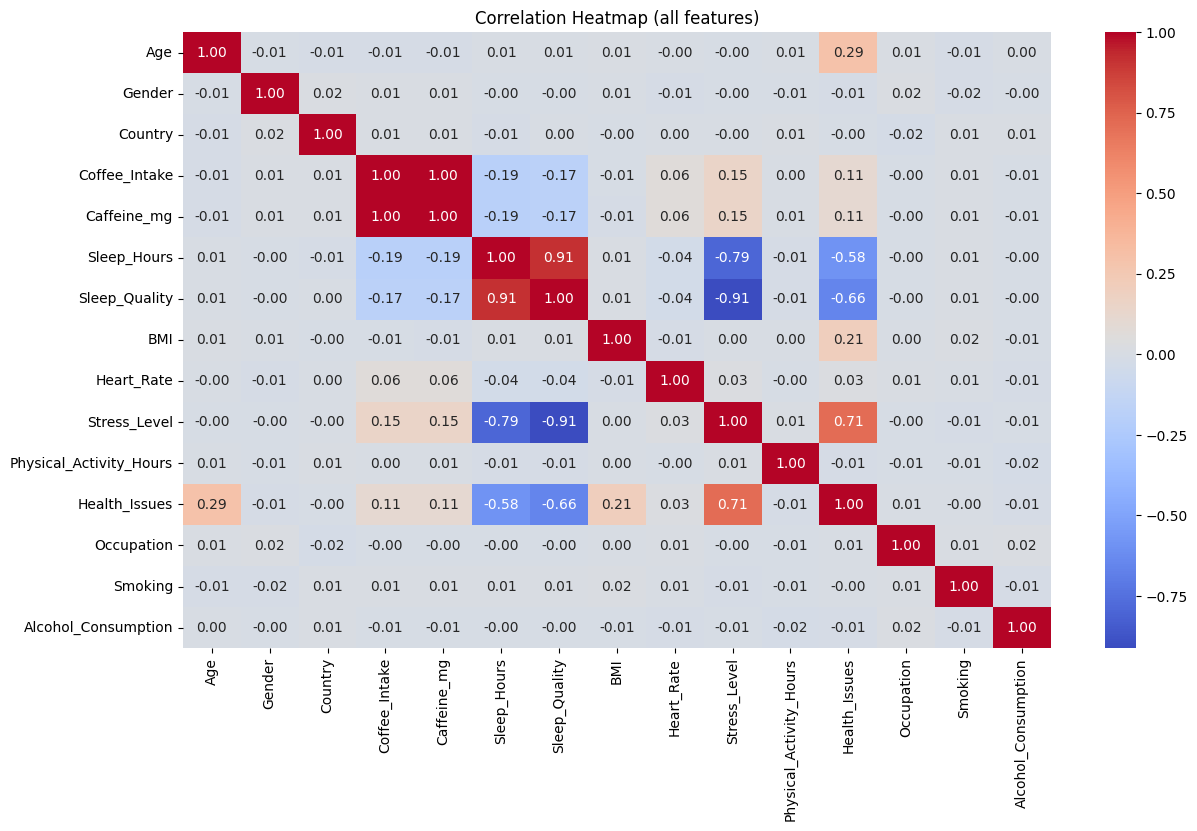

In [234]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=True, fmt=".2f", cbar=True)
plt.title("Correlation Heatmap (all features)")
plt.show()

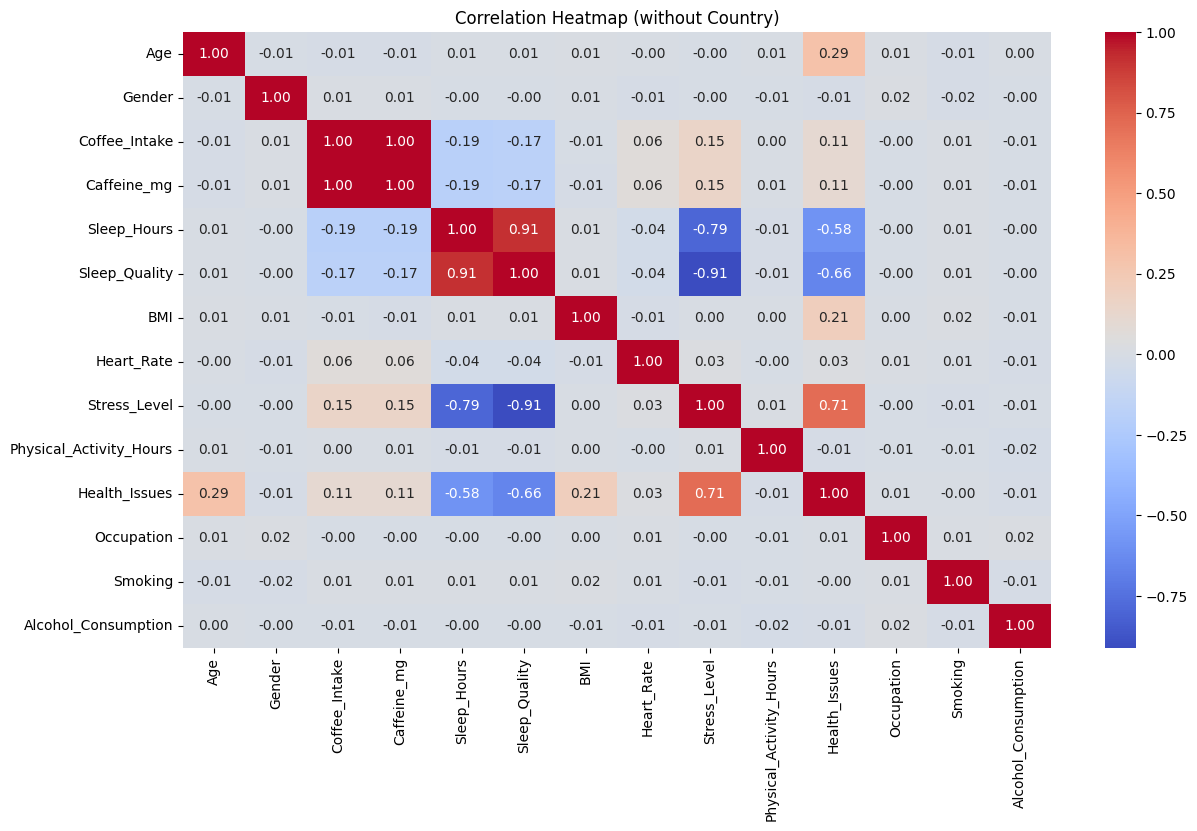

In [235]:
df_no_country = df.drop(columns=["Country"], errors="ignore")

plt.figure(figsize=(14,8))
sns.heatmap(df_no_country.corr(numeric_only=True), cmap="coolwarm", annot=True, fmt=".2f", cbar=True)
plt.title("Correlation Heatmap (without Country)")
plt.show()

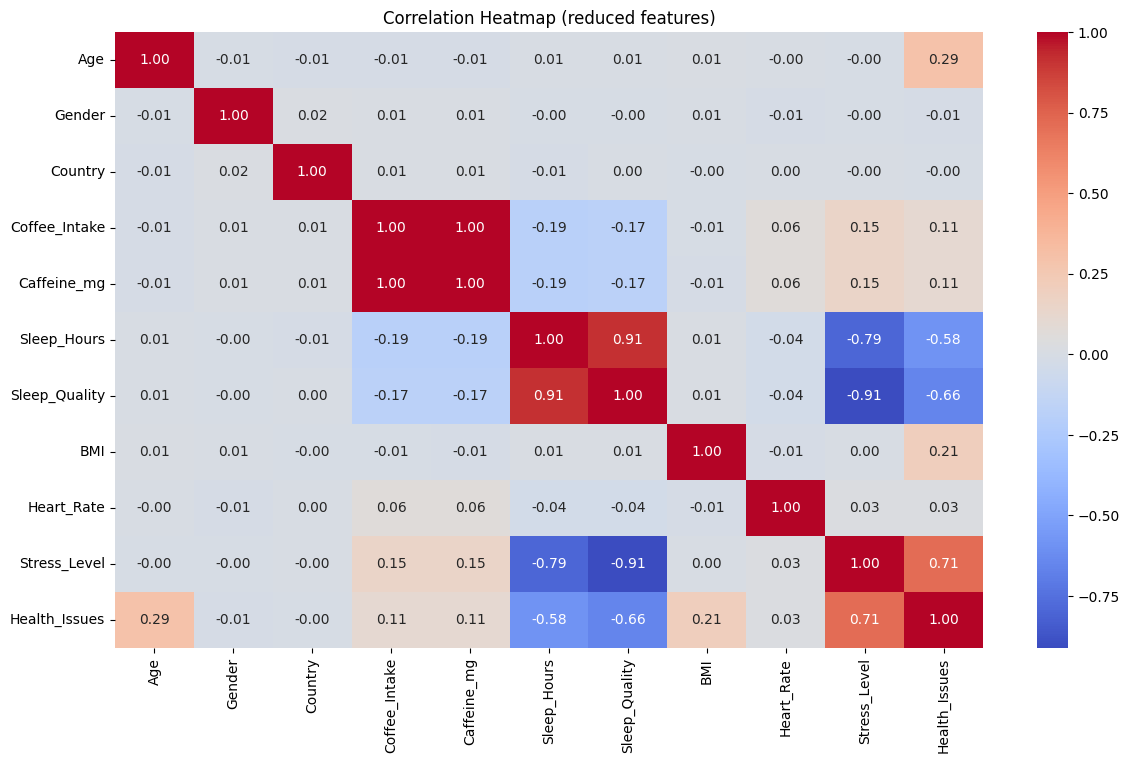

In [236]:
df_reduced = df.drop(columns=[
    "Physical_Activity_Hours",
    "Occupation",
    "Smoking",
    "Alcohol_Consumption"
], errors="ignore")

plt.figure(figsize=(14,8))
sns.heatmap(df_reduced.corr(numeric_only=True), cmap="coolwarm", annot=True, fmt=".2f", cbar=True)
plt.title("Correlation Heatmap (reduced features)")
plt.show()

In [237]:
X = df_reduced.drop("Health_Issues", axis=1)
y = df_reduced["Health_Issues"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [238]:
dt_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)
dt_entropy.fit(X_train, y_train)
y_pred_entropy = dt_entropy.predict(X_test)
acc_entropy = accuracy_score(y_test, y_pred_entropy)

dt_gini = DecisionTreeClassifier(criterion="gini", random_state=42)
dt_gini.fit(X_train, y_train)
y_pred_gini = dt_gini.predict(X_test)
acc_gini = accuracy_score(y_test, y_pred_gini)

print("Decision Tree (Entropy) Accuracy:", acc_entropy)
print("Decision Tree (Gini) Accuracy:", acc_gini)

Decision Tree (Entropy) Accuracy: 0.998
Decision Tree (Gini) Accuracy: 0.9975


In [239]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)

print("Naive Bayes Accuracy:", acc_nb)

Naive Bayes Accuracy: 0.8575


In [240]:
results = pd.DataFrame({
    "Model": ["Decision Tree (Entropy)", "Decision Tree (Gini)", "Naive Bayes"],
    "Accuracy": [acc_entropy, acc_gini, acc_nb]
})
results

,Model,Accuracy
0,Decision Tree (Entropy),0.9980
1,Decision Tree (Gini),0.9975
2,Naive Bayes,0.8575


In [241]:
new_data = {
    'Age': 28,
    'Gender': 'Male',
    'Country': 'Brazil',
    'Coffee_Intake': 3,
    'Caffeine_mg': 280,
    'Sleep_Hours': 5,
    'Sleep_Quality': sleep_map['Poor'],
    'BMI': 25.4,
    'Heart_Rate': 85,
    'Stress_Level': stress_map['High'],
    'Physical_Activity_Hours': 2,
    'Occupation': 'Student',
    'Smoking': 1,
    'Alcohol_Consumption': 1
}

new_df = pd.DataFrame([new_data])

# Apply label encoding for categorical features
new_df['Gender'] = le_gender.transform(new_df['Gender'])
new_df['Country'] = le_country.transform(new_df['Country'])
new_df['Occupation'] = le_occ.transform(new_df['Occupation'])

# Align with reduced training features
new_df = new_df.reindex(columns=X.columns, fill_value=0)

# Pick best model
best_model = dt_entropy if acc_entropy >= acc_gini and acc_entropy >= acc_nb else (
    dt_gini if acc_gini >= acc_nb else nb
)

pred_class = best_model.predict(new_df)[0]
health_decode = {v: k for k, v in health_map.items()}
pred_label = health_decode[pred_class]

print("Predicted Health Issue for new record:", pred_label)

Predicted Health Issue for new record: Mild
